<a href="https://colab.research.google.com/github/Dikshuy/hail_UMICaana/blob/master/Aanal_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Letters'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Letters


In [ ]:

symbols = []
alphabets = []

img_path = '/content/drive/My Drive/Letters'
for file in os.listdir('/content/drive/My Drive/Letters'):
  img = cv2.imread(os.path.join(img_path, file), 0)
  _, thresh = cv2.threshold(img, 155, 255, cv2.THRESH_BINARY)
#  canny = cv2.Canny(thresh, 155, 255)
#  cv2_imshow(canny)
  symbols.append(thresh)

  if file == "C2.jpg":
    alphabets.append("C")
  else:
    alphabets.append(file[0])

#cv2_imshow(symbols[7])



In [125]:

encoder = np.array(alphabets)

label_encoder = LabelEncoder()
integer_encoder = label_encoder.fit_transform(encoder)
#print(alphabets)

one_hot = to_categorical(integer_encoder)
#print(one_hot)
data = []
label = []

#for j in range(len(one_hot)):
"""print(len(one_hot))
print(one_hot[:])
for i in range(18):
  cv2_imshow(symbols[i])"""

'print(len(one_hot))\nprint(one_hot[:])\nfor i in range(18):\n  cv2_imshow(symbols[i])'

In [ ]:
for j in range(len(symbols)):
  for i in range(-5, 6):
    rows, cols = symbols[j].shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 5*i, 1)
    res = cv2.warpAffine(symbols[j], M, (rows, cols))
    label.append(one_hot[j])
    #print(one_hot[0][j])
    data.append(res)
    
print(label[70])
#cv2_imshow(data[70]) 
print(len(label), len(data))

num = len(label)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
198 198


In [ ]:
for j in range(num):
  for i in range(7, 13, 2):
    res_img = cv2.GaussianBlur(data[j], (i, i), 0)
    data.append(res_img)
    label.append(label[j])
    
print(len(label), len(data))

for j in range(num):
  res_img = cv2.medianBlur(data[j], 11)
  data.append(res_img)
  label.append(label[j])

print(len(label), len(data))

#print(len(label), len(data))
#cv2_imshow(data[650])
#print(label[650]) 
#cv2_imshow(data[15])


#print(len(label), len(data))
#print(label[1500])
#cv2_imshow(data[1500])

792 792
990 990


In [ ]:
for j in range(num):
  for i in range(9, 13, 2):
    res_img = cv2.bilateralFilter(data[j], i, 200, 200)
    data.append(res_img)
    label.append(label[j])

print(len(label), len(data))

1386 1386


In [ ]:
for j in range(num):
  res_img = cv2.erode(data[j], np.ones((5,5)), iterations = 1)
  data.append(res_img)
  label.append(label[j])
  #cv2_imshow(res_img)
print(len(label), len(data))

1584 1584


In [ ]:
for j in range(num):
  res_img = cv2.dilate(data[j], np.ones((5, 5), np.uint8), iterations = 1)
  data.append(res_img)
  label.append(label[j])

print(len(label), len(data))

1782 1782


In [ ]:
"""for j in range(num):
  
  for i in range(1,7,2):
    img7 = cv2.dilate(img7, np.ones((i, i), np.uint8), iterations =1)
    img7 = cv2.erode(data[j], np.ones((i, i), np.uint8), iterations =1)
    data.append(img7)
    cv2_imshow(img7)
    label.append(label[j])
#  cv2_imshow(data[j])
#cv2_imshow(data[4112])
#print(label[4112])
#print(len(label), len(data))"""

'for j in range(num):\n  \n  for i in range(1,7,2):\n    img7 = cv2.dilate(img7, np.ones((i, i), np.uint8), iterations =1)\n    img7 = cv2.erode(data[j], np.ones((i, i), np.uint8), iterations =1)\n    data.append(img7)\n    cv2_imshow(img7)\n    label.append(label[j])\n#  cv2_imshow(data[j])\n#cv2_imshow(data[4112])\n#print(label[4112])\n#print(len(label), len(data))'

In [ ]:
for j in range(num):
  data.append(cv2.pyrDown(data[j]))
  label.append(label[j])
  data.append(cv2.pyrUp(data[j]))
  label.append(label[j])
#  cv2_imshow(cv2.pyrDown(data[j]))
#print(len(label), len(data))


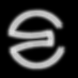

In [ ]:
for j in range(num):
  img  = cv2.pyrDown(data[j])
  img = cv2.pyrDown(img)
  img = cv2.pyrUp(img)
  img = cv2.dilate(img, np.ones((3, 3), np.uint8), iterations = 1 )
  data.append(img)
  label.append(label[j])

cv2_imshow(data[-5])
#print(label[-5])

In [ ]:
for i in range(len(data)):
  data[i] = cv2.resize(data[i], (400, 400))
  
#print(data[4000].shape)  

In [ ]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, ZeroPadding2D
from keras.models import Model
from tensorflow.keras.losses import MAE
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model
data = np.array(data)
data = np.reshape(data, (data.shape[0], 400, 400, 1))
label = np.array(label)
print(label.shape)
#print(data[1200].shape)

#X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size = 0.2, stratify=label, random_state = 1)
#for j in range(1000, 1010):
#  cv2_imshow(X_train[j])
X_train = data
Y_train = label
print(X_train.shape, Y_train.shape)
#print(X_test.shape)

(2376, 17)
(2376, 400, 400, 1) (2376, 17)


Epoch 1/15
75/75 [==============================] - 40s 538ms/step - loss: 2.8268 - accuracy: 0.1094
Epoch 2/15
75/75 [==============================] - 38s 509ms/step - loss: 1.4581 - accuracy: 0.5004
Epoch 3/15
75/75 [==============================] - 38s 508ms/step - loss: 0.6291 - accuracy: 0.7614
Epoch 4/15
75/75 [==============================] - 38s 510ms/step - loss: 0.4508 - accuracy: 0.8287
Epoch 5/15
75/75 [==============================] - 38s 510ms/step - loss: 0.4103 - accuracy: 0.8392
Epoch 6/15
75/75 [==============================] - 38s 513ms/step - loss: 0.3541 - accuracy: 0.8649
Epoch 7/15
75/75 [==============================] - 38s 511ms/step - loss: 0.2990 - accuracy: 0.8847
Epoch 8/15
75/75 [==============================] - 38s 510ms/step - loss: 0.2954 - accuracy: 0.8771
Epoch 9/15
75/75 [==============================] - 38s 510ms/step - loss: 0.2757 - accuracy: 0.8897
Epoch 10/15
75/75 [==============================] - 38s 509ms/step - loss: 0.2656 - accura

KeyError: ignored

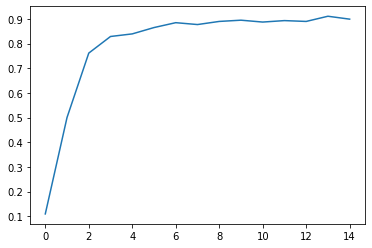

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import keras
model = Sequential() 
model.add(Conv2D(32, (5, 5), strides = (4, 4), padding = 'valid',   input_shape = (400, 400, 1))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(3, 3))) 
  
model.add(Conv2D(64, (5, 5), padding = 'valid')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
  
model.add(Conv2D(96, (3, 3),  padding = 'same', activation = 'relu')) 
model.add(Conv2D(64, (3, 3),  padding = 'same', activation = 'relu')) 
model.add(Conv2D(96, (2, 2),  padding = 'same', activation = 'relu')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(3, 3), strides = (2, 2))) 

model.add(Conv2D(128, (5, 5), padding = 'valid')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 

model.add(Flatten()) 
model.add(Dense(96))
model.add(Activation('relu')) 

model.add(Dense(48))
model.add(Activation('relu'))

model.add(Dense(32)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
"""
model.add(Dense(100)) 
model.add(Activation('relu')) 
"""
model.add(Dense(17)) 
model.add(Activation('softmax')) 

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'Adam', metrics = ['accuracy'])
X_test = np.array(cv2.imread('/content/drive/My Drive/B.jpg'))

history = model.fit(X_train, Y_train, epochs = 15 )

import matplotlib.pyplot as plt
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:

img1 = cv2.imread('/content/drive/My Drive/Files/Y.png', 0)
#cv2_imshow(img1)
img1 = cv2.resize(img1, (400, 400))
img1 = rows, cols = img1.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
img1 = cv2.warpAffine(img1, M, (rows, cols))
cv2_imshow(img1)
#cv2_imshow(img1)
_, thresh = cv2.threshold(img1, 155, 255, cv2.THRESH_BINARY_INV)
#data = np.array(thresh)
#cv2_imshow(thresh)
canny = cv2.Canny(thresh, 155, 255)
data = []
data.append(thresh)
data = np.reshape(data, (1, 400, 400, 1))
X_test = data


Y_test = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype = 'float64')



score = model.predict((X_test)>0.5).astype("int32")
print(X_test.shape, Y_test.shape)

#score = model.predict(X_test)
#cv2_imshow(canny)
print(score)
#print(X_test.shape)
#for i in range( 300, 400):
#  cv2_imshow(X_test[i])

error: ignored